In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

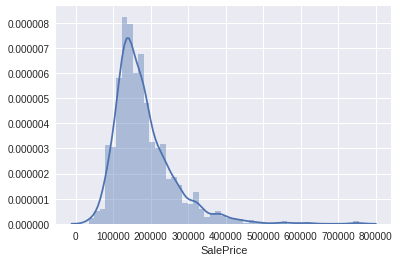

In [5]:
sns.distplot(df_train['SalePrice'])

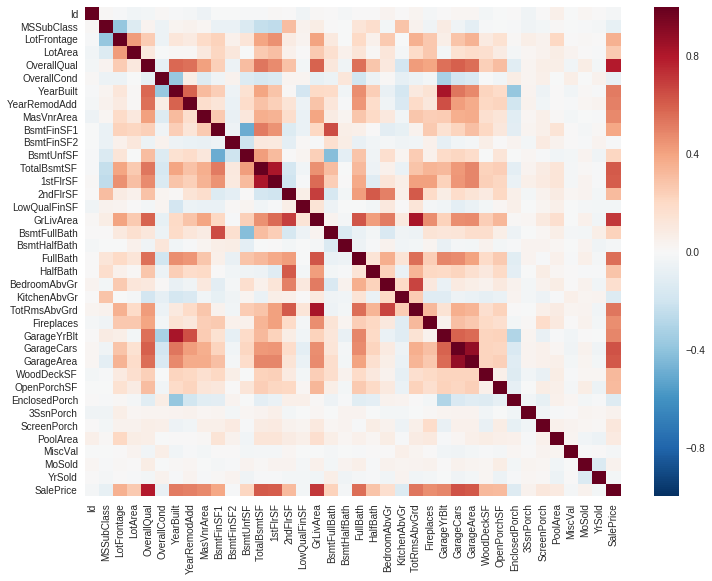

In [6]:
#correlation matrix
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

In [7]:
#saleprice correlation matrix
k = 20
cols = corrmat.nlargest(k,'SalePrice')['SalePrice']
print (cols)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


## Choose the index
To simply train the model, I pick up 3 aspect of the index. 

Area related : GrLivArea, GarageArea, TotalBsmtSF

Number/Rank related: OverallQual(don't know how it compute), FullBath, Fireplaces 

Time related : YearBuilt, YearRemodAdd

In [8]:
#missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(25)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


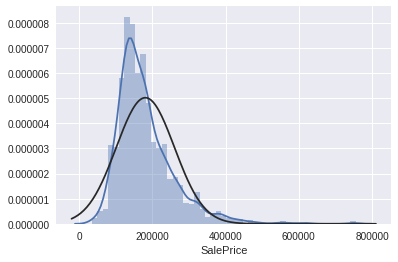

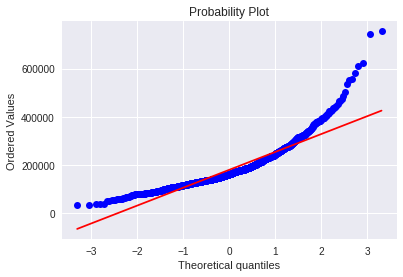

In [9]:
# In the search for normality
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

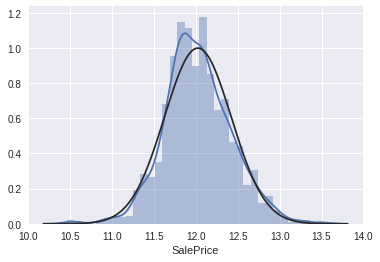

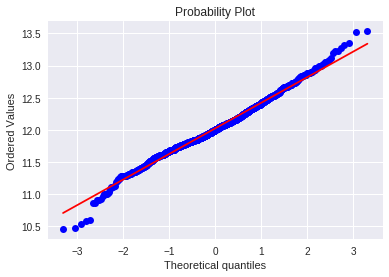

In [10]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

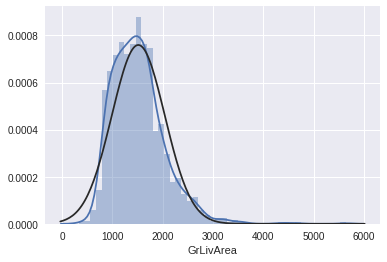

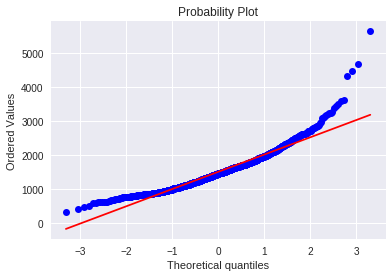

In [11]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'],plot=plt)

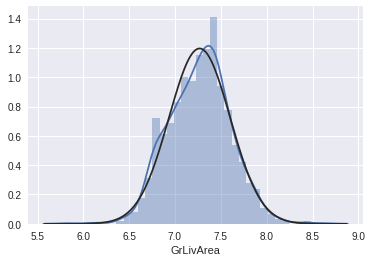

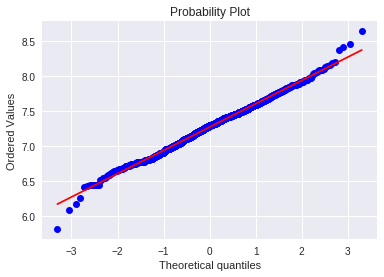

In [12]:
# do log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'],plot=plt)

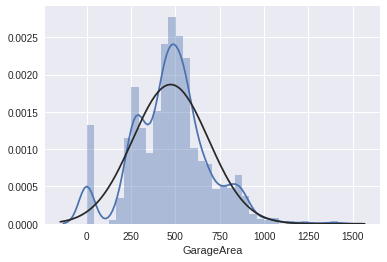

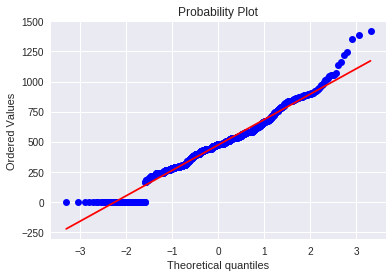

In [13]:
sns.distplot(df_train['GarageArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GarageArea'],plot=plt)

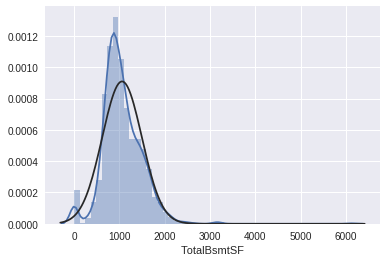

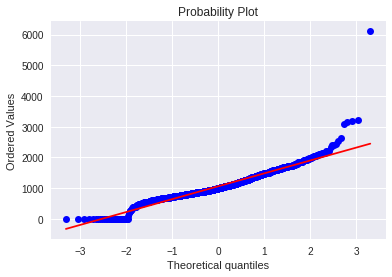

In [14]:
sns.distplot(df_train['TotalBsmtSF'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'],plot=plt)

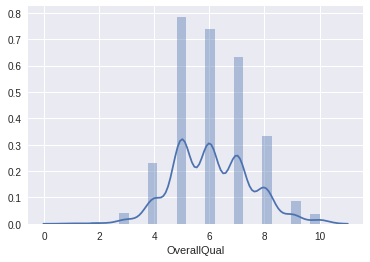

In [15]:
sns.distplot(df_train['OverallQual'])

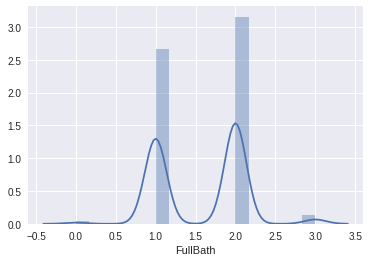

In [16]:
sns.distplot(df_train['FullBath'])

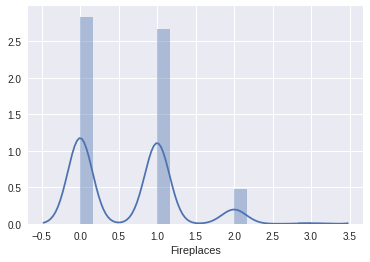

In [17]:
sns.distplot(df_train['Fireplaces'])

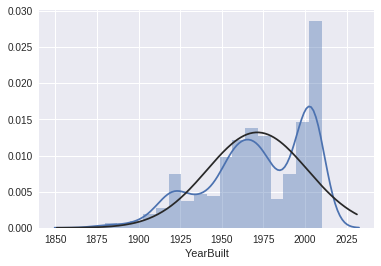

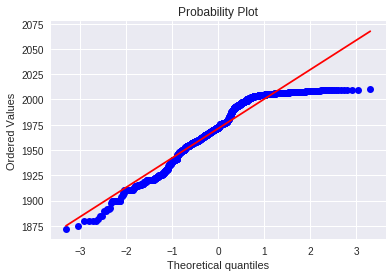

In [18]:
sns.distplot(df_train['YearBuilt'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['YearBuilt'],plot=plt)

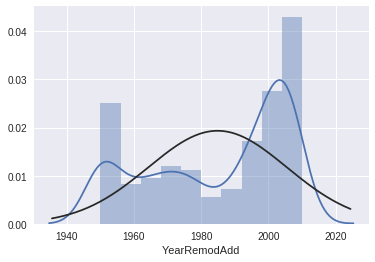

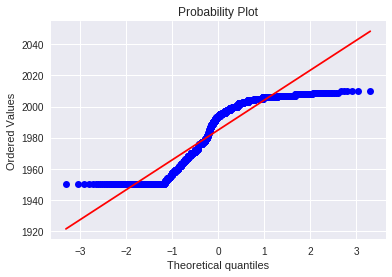

In [19]:
sns.distplot(df_train['YearRemodAdd'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['YearRemodAdd'],plot=plt)

# Pick the data we need
SalePrice

Area related : GrLivArea, GarageArea, TotalBsmtSF

Number/Rank related: OverallQual(don't know how it compute), FullBath, Fireplaces

Time related : YearBuilt, YearRemodAdd

In [20]:
# create new training set by previous feature selection
X_data = pd.concat([df_train['GrLivArea'],df_train['GarageArea'],df_train['TotalBsmtSF'],df_train['OverallQual'],df_train['FullBath'],df_train['Fireplaces'],df_train['YearBuilt'],df_train['YearRemodAdd']],axis=1)
y_data = df_train['SalePrice']

In [21]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=0)

In [22]:
# train the models
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train,y_train)
print("Root Mean squared error: %.8f"
      % rmse((reg.predict(X_test)),y_test))

Root Mean squared error: 0.19458348


In [23]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1,0.25,0.3,0.33,0.375,0.5,1.0,5.0,10.0])
reg.fit (X_train,y_train)
print (reg.alpha_) 
print("Root Mean squared error: %.8f"
      % rmse((reg.predict(X_test)),y_test))

0.33
Root Mean squared error: 0.19455535


In [24]:
from sklearn import linear_model
reg = linear_model.LassoCV(alphas=[0.0001,0.001,0.0125,0.025,0.05])
reg.fit (X_train,y_train)
print (reg.alpha_) 
print("Root Mean squared error: %.8f"
      % rmse((reg.predict(X_test)),y_test))

0.001
Root Mean squared error: 0.19441522


# How about using Xgboost?

In [34]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.8,
                 gamma=0.0,
                 learning_rate=0.001,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.8,
                 seed=42,
                 silent=False)


In [35]:
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print("XGBoost score on training set: ", rmse(y_test, y_pred))

XGBoost score on training set:  0.14765221021


In [27]:
#create prediction csv
df_test = pd.read_csv('test.csv')
#transfer data
df_test['GrLivArea'] = np.log(df_train['GrLivArea'])
X_data = pd.concat([df_test['GrLivArea'],df_test['GarageArea'],df_test['TotalBsmtSF'],df_test['OverallQual'],df_test['FullBath'],df_test['Fireplaces'],df_test['YearBuilt'],df_test['YearRemodAdd']],axis=1)

y_pred_data = regr.predict(X_data)
y_pred_data = np.exp(y_pred_data)

pd.DataFrame({'Id': df_test['Id'], 'SalePrice':y_pred_data}).to_csv('result.csv', index =False) 